In [1]:
import datasets
ds = datasets.load_dataset("mikkoim/aquamonitor-jyu", cache_dir="hf")

In [2]:
import pandas as pd
df = pd.read_parquet("https://huggingface.co/datasets/mikkoim/aquamonitor-jyu/resolve/main/aquamonitor-jyu.parquet.gzip")
df_train = df.query("fold0 == 'train'")
df_val = df.query("fold0 == 'val'")

In [35]:
import aquamonitor
import importlib
importlib.reload(aquamonitor)
am = aquamonitor.AquaMonitorDataset(df_train, ds["train"])

Initializing images...
Done. 40880 images.
Initializing imaging runs...


100%|██████████| 1106/1106 [00:04<00:00, 240.04it/s]


Done. 1106 imaging_runs.
Initializing individuals...
Done. 1049 individuals.


In [36]:
image_id = am.images[0]
imagepair_id = am.imagepairs[0]
imaging_run_id = am.imaging_runs[0]
individual_id = am.individuals[0]

In [37]:
print(am(image=image_id))
am.load(image=image_id)

AquaMonitorImage(id='1_2-A1-Le-ala1-1_1_2023_07_04-15-11-01-271.jpg', imaging_run='2-A1-Le-ala1-1_1', area=4422, perimeter=362, holes=0, max_feret_diameter=130, area_holes=4422, roi_left=0, roi_top=10, roi_right=460, roi_bottom=470, width=460, height=460, imaging_time=Timestamp('2023-07-04 15:11:01.271000'))


{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 'data': {'id': '1_2-A1-Le-ala1-1_1_2023_07_04-15-11-01-271.jpg',
  'imaging_run': '2-A1-Le-ala1-1_1',
  'area': 4422,
  'perimeter': 362,
  'holes': 0,
  'max_feret_diameter': 130,
  'area_holes': 4422,
  'roi_left': 0,
  'roi_top': 10,
  'roi_right': 460,
  'roi_bottom': 470,
  'width': 460,
  'height': 460,
  'imaging_time': Timestamp('2023-07-04 15:11:01.271000')}}

In [38]:
print(am(imagepair=imagepair_id))
am.load(imagepair=imagepair_id)

ImagePair(id='2-A1-Le-ala1-1_1_pair0000', images=(AquaMonitorImage(id='1_2-A1-Le-ala1-1_1_2023_07_04-15-11-01-394.jpg', imaging_run='2-A1-Le-ala1-1_1', area=4200, perimeter=339, holes=1, max_feret_diameter=126, area_holes=4201, roi_left=0, roi_top=60, roi_right=460, roi_bottom=520, width=460, height=460, imaging_time=Timestamp('2023-07-04 15:11:01.394000')), AquaMonitorImage(id='2_2-A1-Le-ala1-1_1_2023_07_04-15-11-01-404.jpg', imaging_run='2-A1-Le-ala1-1_1', area=3609, perimeter=403, holes=0, max_feret_diameter=154, area_holes=3609, roi_left=0, roi_top=6, roi_right=460, roi_bottom=466, width=460, height=460, imaging_time=Timestamp('2023-07-04 15:11:01.404000'))))


{'image': (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>),
 'data': ({'id': '1_2-A1-Le-ala1-1_1_2023_07_04-15-11-01-394.jpg',
   'imaging_run': '2-A1-Le-ala1-1_1',
   'area': 4200,
   'perimeter': 339,
   'holes': 1,
   'max_feret_diameter': 126,
   'area_holes': 4201,
   'roi_left': 0,
   'roi_top': 60,
   'roi_right': 460,
   'roi_bottom': 520,
   'width': 460,
   'height': 460,
   'imaging_time': Timestamp('2023-07-04 15:11:01.394000')},
  {'id': '2_2-A1-Le-ala1-1_1_2023_07_04-15-11-01-404.jpg',
   'imaging_run': '2-A1-Le-ala1-1_1',
   'area': 3609,
   'perimeter': 403,
   'holes': 0,
   'max_feret_diameter': 154,
   'area_holes': 3609,
   'roi_left': 0,
   'roi_top': 6,
   'roi_right': 460,
   'roi_bottom': 466,
   'width': 460,
   'height': 460,
   'imaging_time': Timestamp('2023-07-04 15:11:01.404000')})}

In [39]:
print(am(imaging_run=imaging_run_id))
am.load(imaging_run=imaging_run_id, imagepairs=True)

ImagingRun(id='2-A1-Le-ala1-1_1', individual='2-A1-Le-ala1-1', camera1=[AquaMonitorImage(id='1_2-A1-Le-ala1-1_1_2023_07_04-15-11-01-271.jpg', imaging_run='2-A1-Le-ala1-1_1', area=4422, perimeter=362, holes=0, max_feret_diameter=130, area_holes=4422, roi_left=0, roi_top=10, roi_right=460, roi_bottom=470, width=460, height=460, imaging_time=Timestamp('2023-07-04 15:11:01.271000')), AquaMonitorImage(id='1_2-A1-Le-ala1-1_1_2023_07_04-15-11-01-320.jpg', imaging_run='2-A1-Le-ala1-1_1', area=4371, perimeter=352, holes=0, max_feret_diameter=129, area_holes=4371, roi_left=0, roi_top=30, roi_right=460, roi_bottom=490, width=460, height=460, imaging_time=Timestamp('2023-07-04 15:11:01.320000')), AquaMonitorImage(id='1_2-A1-Le-ala1-1_1_2023_07_04-15-11-01-394.jpg', imaging_run='2-A1-Le-ala1-1_1', area=4200, perimeter=339, holes=1, max_feret_diameter=126, area_holes=4201, roi_left=0, roi_top=60, roi_right=460, roi_bottom=520, width=460, height=460, imaging_time=Timestamp('2023-07-04 15:11:01.394000

{'image': [(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>),
  (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>),
  (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>),
  (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>),
  (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>),
  (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>),
  (<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
   <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>),
  (<PIL.JpegImagePlugin.JpegImag

In [46]:
am.load(individual=individual_id)[0]["image"]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256>,
 <PIL.Jpeg

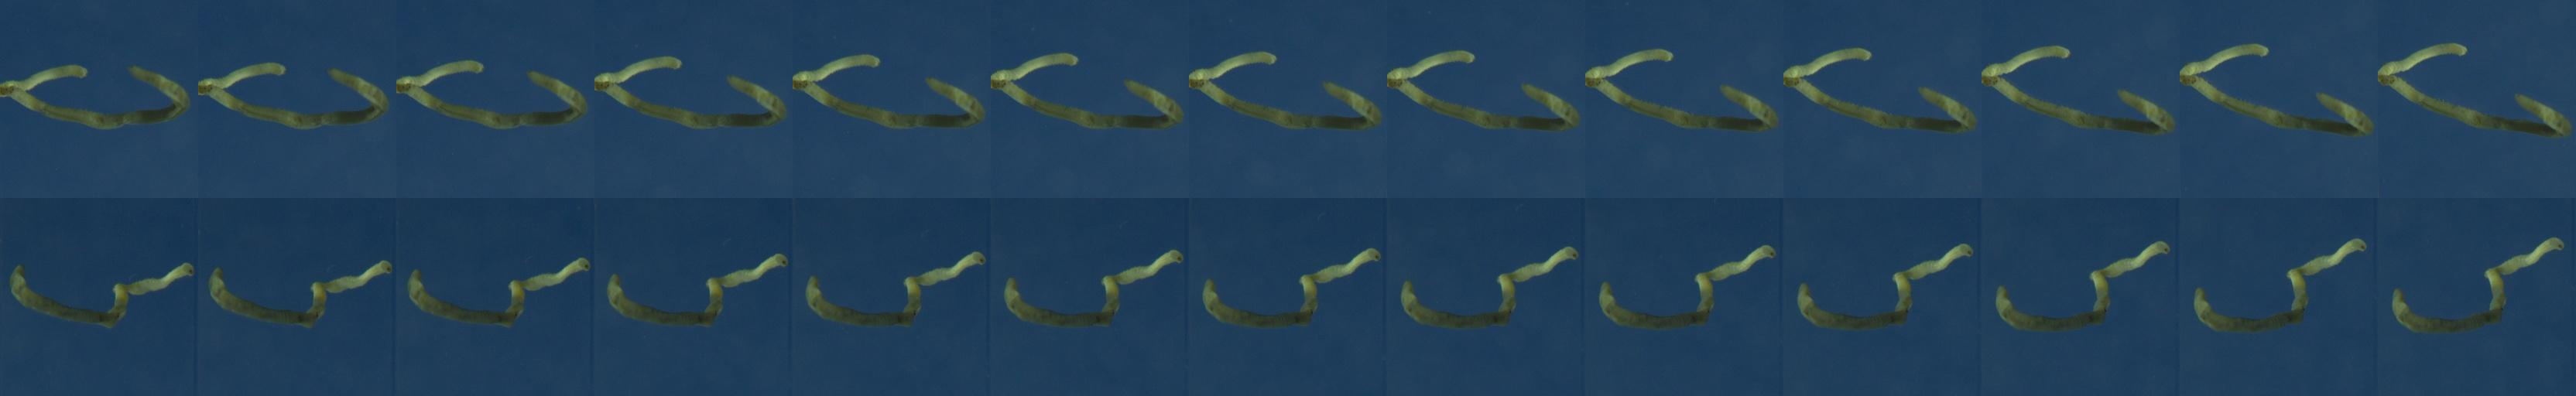

In [56]:
from aquamonitor.utils import stack_images
sample = df_train.sample(1)
imaging_run_id = sample["imaging_run"].iloc[0]

imagepairs = am.load(imaging_run=imaging_run_id, imagepairs=True)
pair_images = []
for pair in imagepairs["image"]:
    img1 = pair[0]
    img2 = pair[1]
    pair_images.append(stack_images([img1, img2], orientation="vertical"))

stack_images(pair_images, orientation="horizontal")